**Rejection Method**
Say if we want to generate random variable according to pdf $f(x)$, we first construct a "box" containing $f(x).$ Suppose we are able to draw random point y from the box continuously unifomrly, then the probability of $y\le f(x)$ will follow $f(x)$.

More precisely, we consider a pdf $g(x)$ that we know how to generate, and that $cg(x)\ge f(x)$ for some positive (greater than 1?) c. 
So the box is $\mathbb{R}\times [0, cg(x)]$
Then

* $\mbox{generate } v \sim g$
*  $\mbox{generate } y \sim U(0, cg(v))$
* $ \mbox{If } y\le f(v), \mbox{accept } v \mbox{ otherwise reject}.$

Note that the second and third steps can be replaced by
* $\mbox{generate } y \sim U(0, 1)$
* $ \mbox{If } y\le \frac{f(v)}{cg(v)}, \mbox{accept otherwise reject}.$


**Standard Normal Distribution**
In this example, we will use exponential distribution $g(x) = e^{-x}$ to bound 
standard normal $f(x)$. However, for $0<x<\infty$ for $g$. So we consider 
$$f(x) = \frac{2}{\sqrt{2\pi}}e^{-x^2/2}.$$
Once we get the variable, we evenly let it be positive or negative.


It is easy to see that we can take $c = \sqrt{2e/\pi}$, and 
$$\frac{f(v)}{cg(v)} = e^{-\frac{(v-1)^2}{2}}$$

In [118]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline 

#exponential distribution by inverse function method
def exp_distribution(lambda_):
        u = npr.uniform()
        return (-1.0/lambda_)*np.log(1-u)
    



        
def std_normal(num_iter):
        #generate v from exp(lambda=1)
        v = np.array([exp_distribution(1) for i in range(num_iter)])
        
        #generate y from standard uniform
        y = npr.rand(num_iter)
        
        #accept according to acc-reject criterion
        accept = v[np.where(y<= np.exp(-((v-1)**2)/2))[0]]
        
        #let accept be positive or negtive with probability 0.5 to 0.5
        judge = npr.rand(len(accept))
        z = np.where(judge<0.5, -accept, accept)
        
        return z

(array([  2.00000000e+00,   2.00000000e+00,   6.00000000e+00,
          6.00000000e+00,   1.00000000e+01,   1.90000000e+01,
          2.50000000e+01,   4.60000000e+01,   8.10000000e+01,
          1.07000000e+02,   1.61000000e+02,   2.20000000e+02,
          3.10000000e+02,   4.41000000e+02,   5.42000000e+02,
          6.77000000e+02,   8.49000000e+02,   1.07000000e+03,
          1.29400000e+03,   1.52200000e+03,   1.77500000e+03,
          2.01800000e+03,   2.12400000e+03,   2.31200000e+03,
          2.38300000e+03,   2.46400000e+03,   2.40000000e+03,
          2.25000000e+03,   2.12400000e+03,   1.97100000e+03,
          1.72200000e+03,   1.52600000e+03,   1.36400000e+03,
          1.09500000e+03,   8.83000000e+02,   6.25000000e+02,
          4.70000000e+02,   3.65000000e+02,   2.69000000e+02,
          2.35000000e+02,   1.16000000e+02,   9.30000000e+01,
          6.00000000e+01,   4.40000000e+01,   2.60000000e+01,
          1.10000000e+01,   1.30000000e+01,   7.00000000e+00,
        

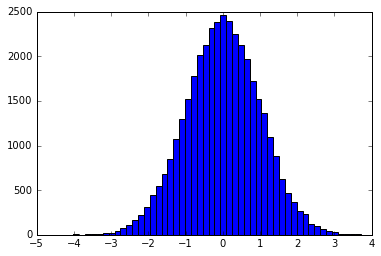

In [119]:
sample = std_normal(50000)
plt.hist(sample, bins=50, normed=False)

In [105]:
x = np.linspace(0,5, 51)
y = np.sin(x)
#fig , ax = plt.subplots()
#ax.plot(x, y)
#ax.plot(x,y)
#f = lambda x: x**3
#fig, ax = plt.subplots()
#ax.plot(x, f(x))
a = np.ones(5)
judge = npr.rand(5)
b =np.where(judge <0.5, a,b)
c = [1 for i in range(5)]
print a
print judge
print len(a)


[ 1.  1.  1.  1.  1.]
[ 0.28454538  0.11912835  0.1481513   0.48923076  0.96745532]
5
